In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [39]:
df = pd.read_csv('query.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-01T01:54:56.710Z,38.754501,-122.441666,4.08,1.60,md,5,162.0,NaN,0.03,...,2022-12-01T01:57:42.101Z,"12km ESE of Hidden Valley Lake, CA",earthquake,0.66,2.81,0.050,4,automatic,nc,nc
1,2022-12-01T01:34:20.890Z,35.876667,-120.418663,6.15,1.59,md,26,89.0,0.014750,0.04,...,2022-12-01T01:52:13.525Z,"3km SSE of Parkfield, CA",earthquake,0.28,0.37,0.130,13,automatic,nc,nc
2,2022-12-01T00:57:27.280Z,33.217000,-116.740333,9.86,1.07,ml,39,41.0,0.024430,0.20,...,2022-12-01T01:08:27.120Z,"4km SE of Lake Henshaw, CA",earthquake,0.25,0.59,0.128,26,automatic,ci,ci
3,2022-12-01T00:43:41.100Z,35.873833,-117.700167,7.99,1.14,ml,18,72.0,0.083710,0.10,...,2022-12-01T00:47:07.735Z,"20km ESE of Little Lake, CA",earthquake,0.19,0.63,0.262,15,automatic,ci,ci
4,2022-12-01T00:41:59.450Z,38.784832,-122.733666,1.83,1.17,md,10,84.0,0.002873,0.02,...,2022-12-01T01:17:18.309Z,"2km ENE of The Geysers, CA",earthquake,0.33,0.76,0.160,2,automatic,nc,nc


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb6ec25c910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb6ec762e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb6ec25cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb6ec75dc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb6ec75d400>],
 'means': []}

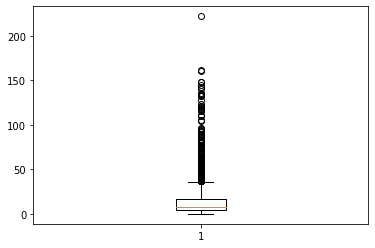

In [40]:
plt.boxplot(df['magNst'])

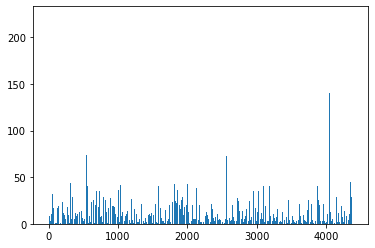

In [42]:
plt.bar(range(len(df['magNst'])),df['magNst'])
plt.show()

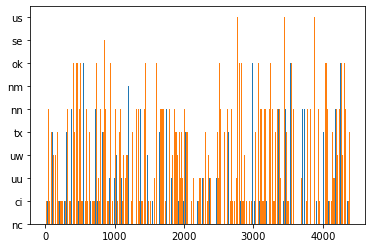

In [36]:
plt.bar(np.arange(len(df['locationSource'])),df['locationSource'])
plt.bar(np.arange(len(df['magSource']))+0.2,df['magSource'])
plt.show()

<AxesSubplot:xlabel='mag'>

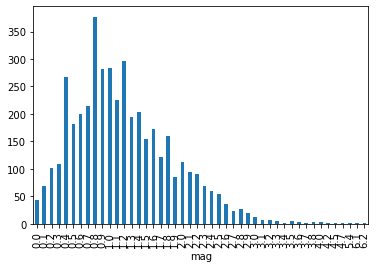

In [53]:
df.round(1).groupby('mag').size().plot(kind='bar')

<AxesSubplot:xlabel='intensity'>

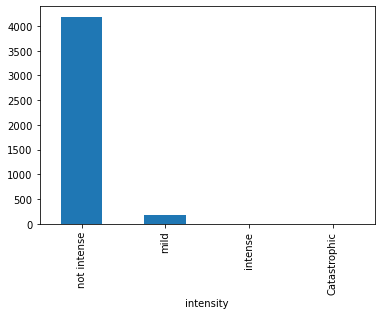

In [51]:
bins = [0, 2.5, 4.5, 6.5, 100]
levels = ['not intense', 'mild', 'intense', 'Catastrophic']
df['intensity'] = pd.cut(df['mag'],bins,labels=levels)
df.groupby('intensity').size().plot(kind='bar')